In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/ml_project1_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [5]:
df.duplicated().sum()

0

In [6]:
def percent_missing(df):
    '''Calculate and return the percentage of missing data points for each column in a DataFrame'''
    percent_nan = 100*df.isnull().sum()/len(df)
    #percent_nan = df.isnull().mean().mul(100)
    percent_nan = percent_nan[percent_nan >0]
    percent_nan = percent_nan.sort_values(ascending=False)
    return percent_nan

In [7]:
percent_missing(df)

,0
Income,1.071429


In [8]:
df1 = df.fillna(df['Income'].median())
percent_missing(df1)

,0


In [9]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

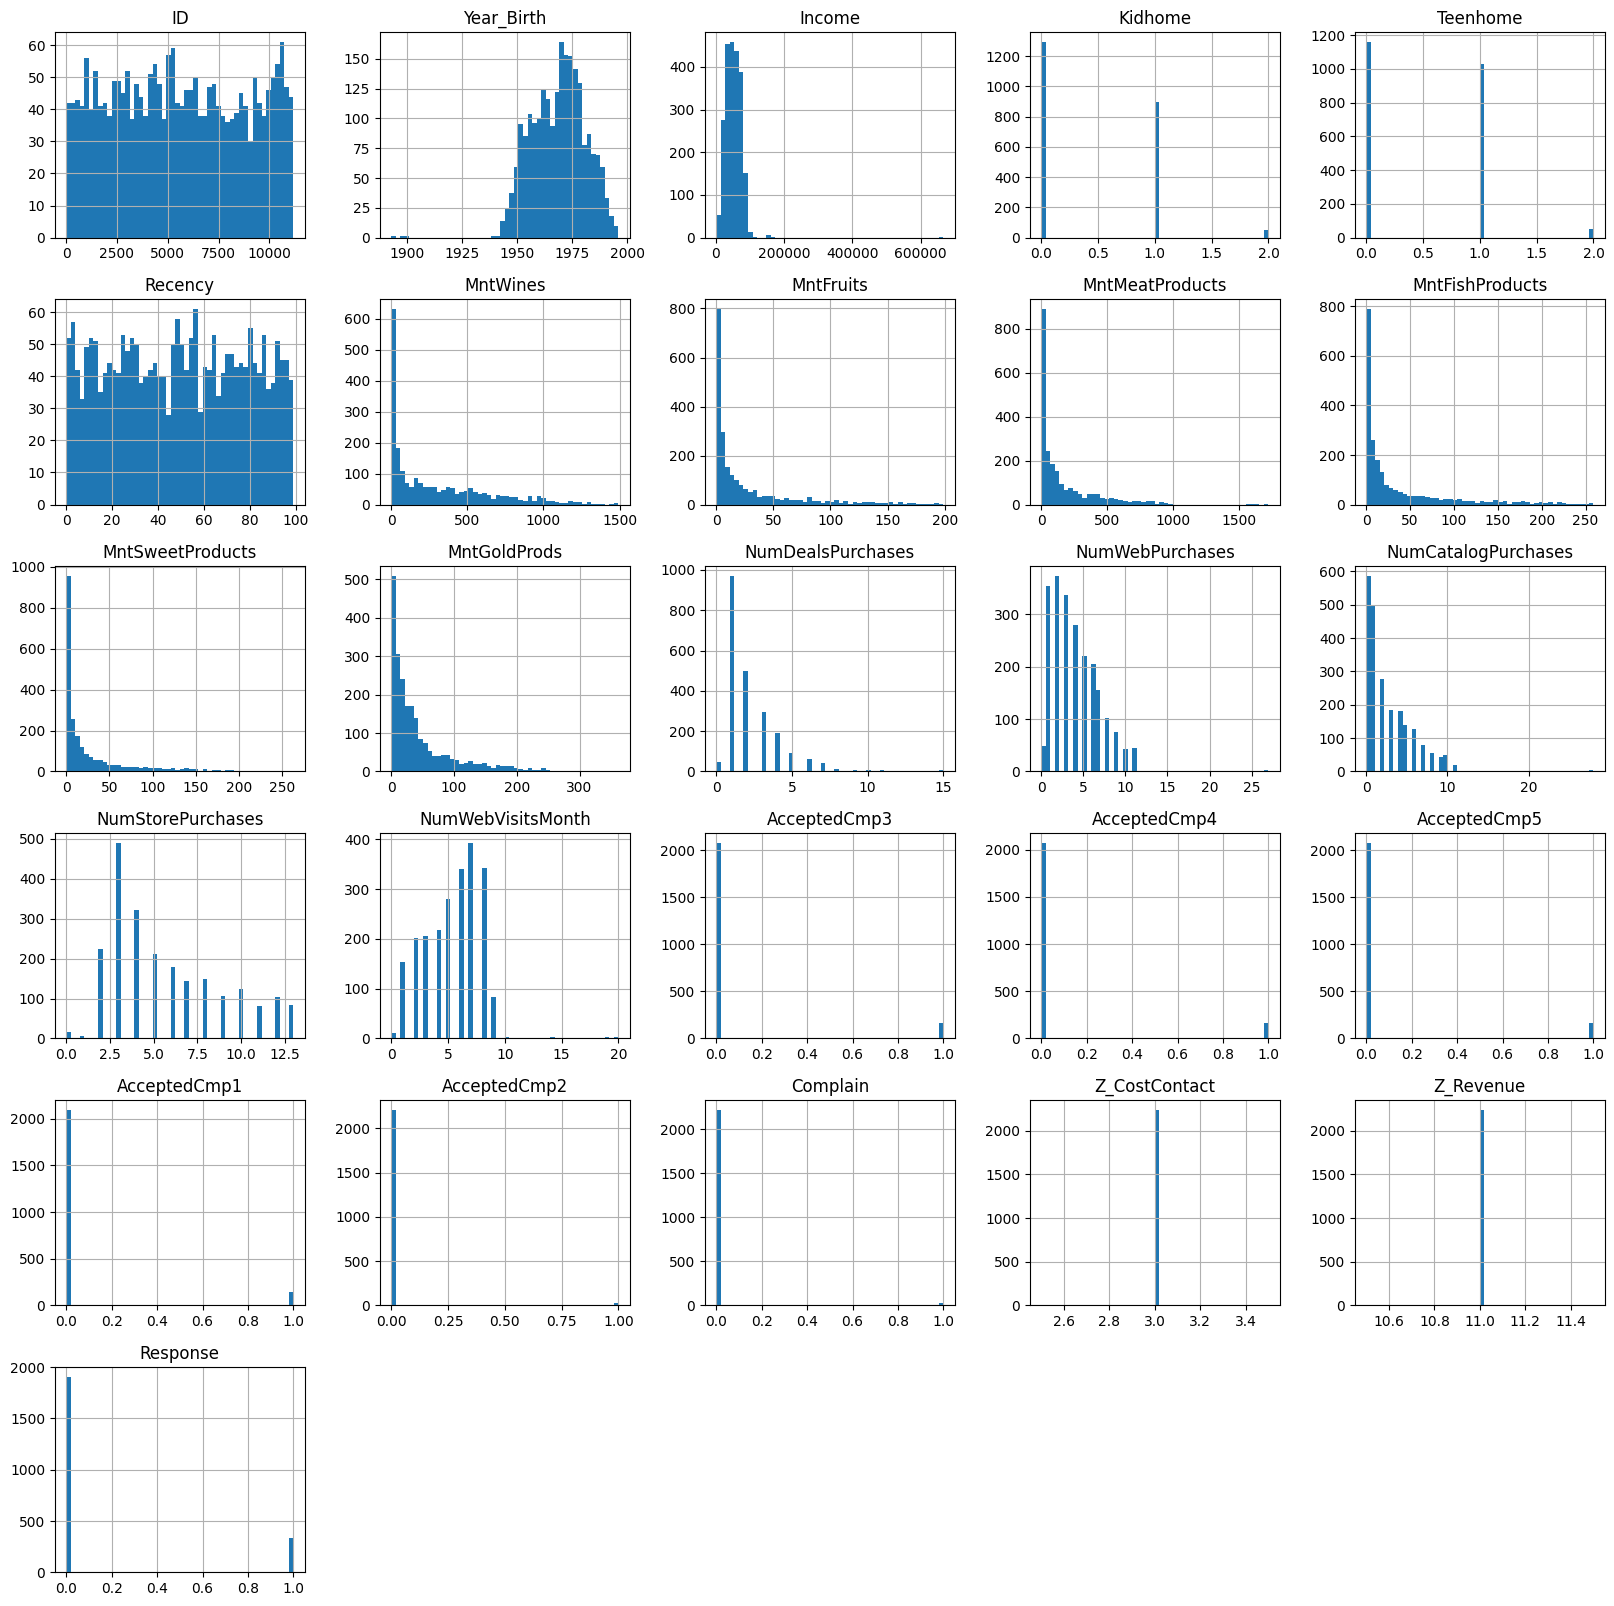

In [10]:
df1.hist(bins=50, figsize=(20,20))
plt.show()

In [11]:
def calculate_rfm_and_features(df):
    # Create rfm features
    frequency = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + \
                df1['NumCatalogPurchases'] + df1['NumStorePurchases']
    monetary = df1['MntWines'] + df['MntFruits'] + df1['MntMeatProducts'] + \
               df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']

    # Create General_Response
    response_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']
    general_response = df1[response_columns].sum(axis=1)

    # Create Age
    age = 2015 - df1['Year_Birth']

    # Create Days_Enrolled (assuming data collected before January 2015)
    reference_date = datetime(2015, 1, 1)
    days_enrolled = (reference_date - pd.to_datetime(df['Dt_Customer'])).dt.days

    # Create a new dataframe with only the specified columns
    result_df = pd.DataFrame({
        'ID': df1['ID'],
        'Education': df1['Education'],
        'Marital_Status': df1['Marital_Status'],
        'Income': df1['Income'],
        'Kidhome': df1['Kidhome'],
        'Teenhome': df1['Teenhome'],
        'Recency': df1['Recency'],
        'NumWebVisitsMonth': df1['NumWebVisitsMonth'],
        'Complain': df1['Complain'],
        'Frequency': frequency,
        'Monetary': monetary,
        'General_Response': general_response,
        'Age': age,
        'Days_Enrolled': days_enrolled
    })

    return result_df


df2 = calculate_rfm_and_features(df1)

In [12]:
# df2.duplicated().sum()
df2.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Frequency,Monetary,General_Response,Age,Days_Enrolled
0,5524,Graduation,Single,58138.0,0,0,58,7,0,25,1617,1,58,849
1,2174,Graduation,Single,46344.0,1,1,38,5,0,6,27,0,61,299
2,4141,Graduation,Together,71613.0,0,0,26,4,0,21,776,0,50,498
3,6182,Graduation,Together,26646.0,1,0,26,6,0,8,53,0,31,325
4,5324,PhD,Married,58293.0,1,0,94,5,0,19,422,0,34,347


In [13]:
categorical_columns = df2.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df2[column].value_counts())
    print("\n")

Value counts for Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Value counts for Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64




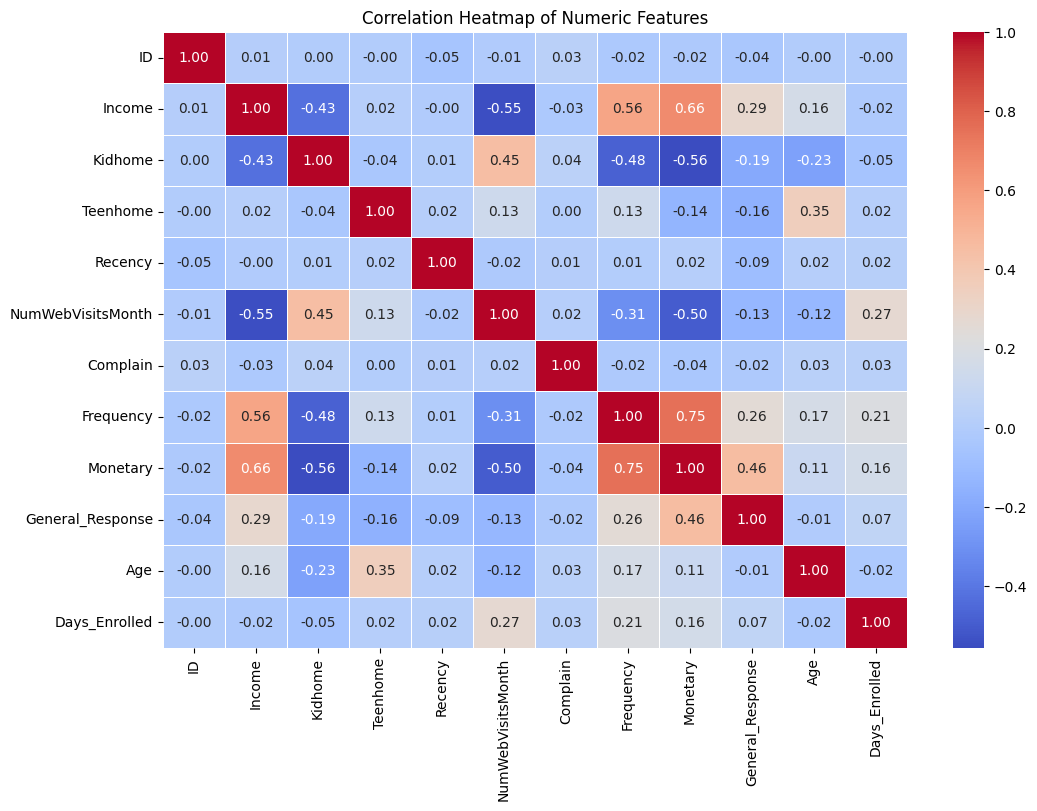

In [14]:
numeric_features = df2.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_features.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [15]:
rfm_data = df2[['ID','Recency','Frequency','Monetary']]
rfm_data.head()

,ID,Recency,Frequency,Monetary
0,5524,58,25,1617
1,2174,38,6,27
2,4141,26,21,776
3,6182,26,8,53
4,5324,94,19,422


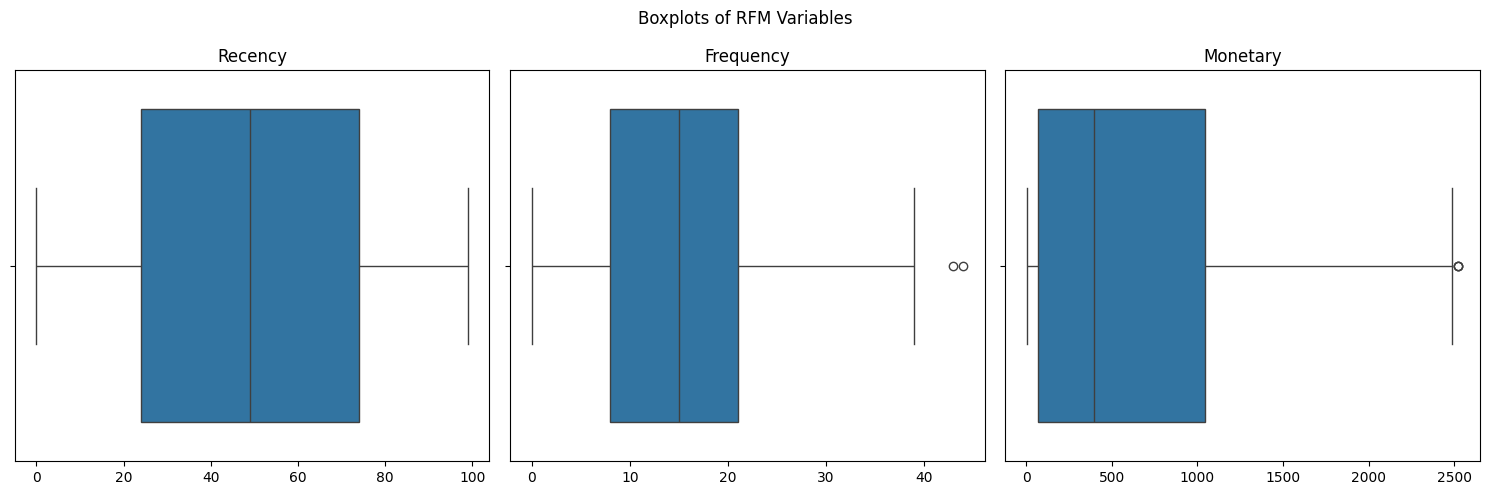

In [16]:
rfm_features = ['Recency', 'Frequency', 'Monetary']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Boxplots of RFM Variables')

for i, variable in enumerate(rfm_features):
    sns.boxplot(x= rfm_data[variable], ax=axes[i])
    axes[i].set_title(variable.capitalize())
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [18]:
rfm_data1 = rfm_data.drop(columns=['ID'])

In [19]:
col_names = ['Recency', 'Frequency', 'Monetary']
features = rfm_data1[col_names]

standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(features)

# Create a new DataFrame with scaled features and original column names
rfm_scaled = pd.DataFrame(scaled_features, columns=col_names)

# Display the first 5 rows of the scaled dataframe
print(rfm_scaled.head())

    Recency  Frequency  Monetary
0  0.307039   1.320826  1.679417
1 -0.383664  -1.154596 -0.961275
2 -0.798086   0.799685  0.282673
3 -0.798086  -0.894025 -0.918094
4  1.550305   0.539114 -0.305254


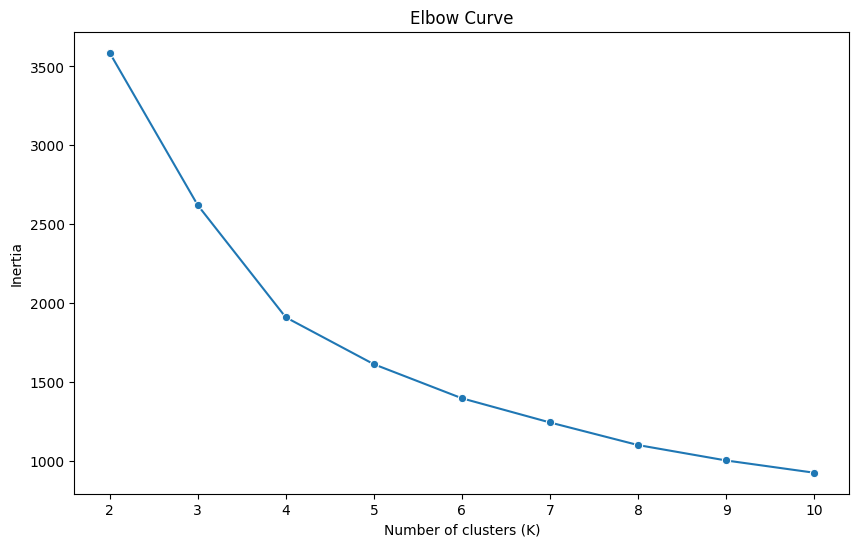

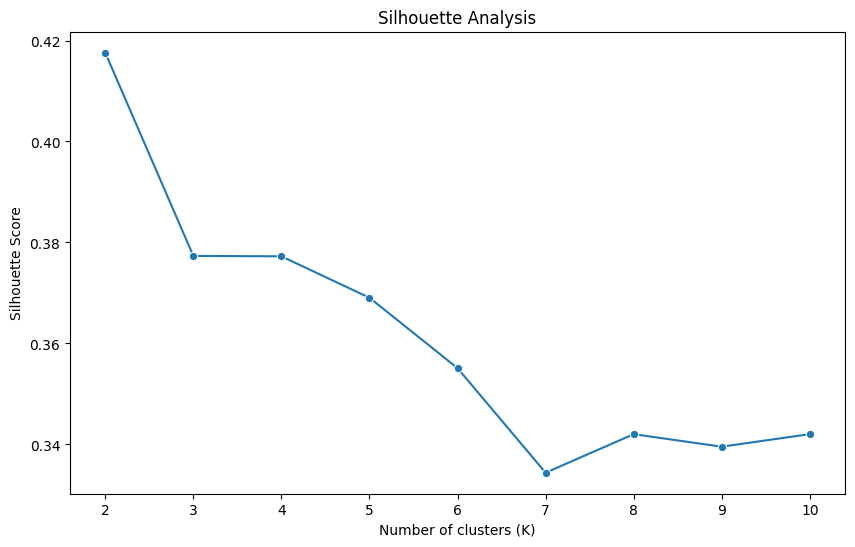

Optimal number of clusters (Elbow method): 7.0
Optimal number of clusters (Silhouette method): 2


In [20]:
min_clusters, max_clusters = 2, 10
cluster_range = range(min_clusters, max_clusters + 1)

# Compute metrics
results = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    results.append({
        'n_clusters': k,
        'inertia': kmeans.inertia_,
        'silhouette': silhouette_score(rfm_scaled, kmeans.labels_)
    })

df_results = pd.DataFrame(results)

def plot_metric(data, x, y, title, ylabel):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=x, y=y, marker='o')
    plt.title(title)
    plt.xlabel('Number of clusters (K)')
    plt.ylabel(ylabel)
    plt.show()

# Plot elbow curve and silhouette scores
plot_metric(df_results, 'n_clusters', 'inertia', 'Elbow Curve', 'Inertia')
plot_metric(df_results, 'n_clusters', 'silhouette', 'Silhouette Analysis', 'Silhouette Score')

# Find optimal K
optimal_k_elbow = df_results.iloc[np.argmax(np.diff(df_results['inertia'])[1:] / np.diff(df_results['inertia'])[:-1]) + 1]['n_clusters']
optimal_k_silhouette = df_results.loc[df_results['silhouette'].idxmax(), 'n_clusters']

print(f"Optimal number of clusters (Elbow method): {optimal_k_elbow}")
print(f"Optimal number of clusters (Silhouette method): {optimal_k_silhouette}")

In [21]:
clusters_number = 2

kmeans = KMeans(random_state=42, n_clusters=clusters_number, \
                init='k-means++', n_init=50, max_iter=1000)
kmeans.fit(rfm_scaled)

KMeans(max_iter=1000, n_clusters=2, n_init=50, random_state=42)

In [22]:
from sklearn.metrics import silhouette_score

print(silhouette_score(rfm_scaled, kmeans.labels_, metric='euclidean'))

0.4175808687967328


In [23]:
rfm_data['Cluster'] = kmeans.predict(rfm_scaled)

In [24]:
rfm_data.head()

,ID,Recency,Frequency,Monetary,Cluster
0,5524,58,25,1617,0
1,2174,38,6,27,1
2,4141,26,21,776,0
3,6182,26,8,53,1
4,5324,94,19,422,0


In [25]:
rfm_clustered = rfm_data.copy()
#rfm_clustered['Customer_ID'] = df1['ID']

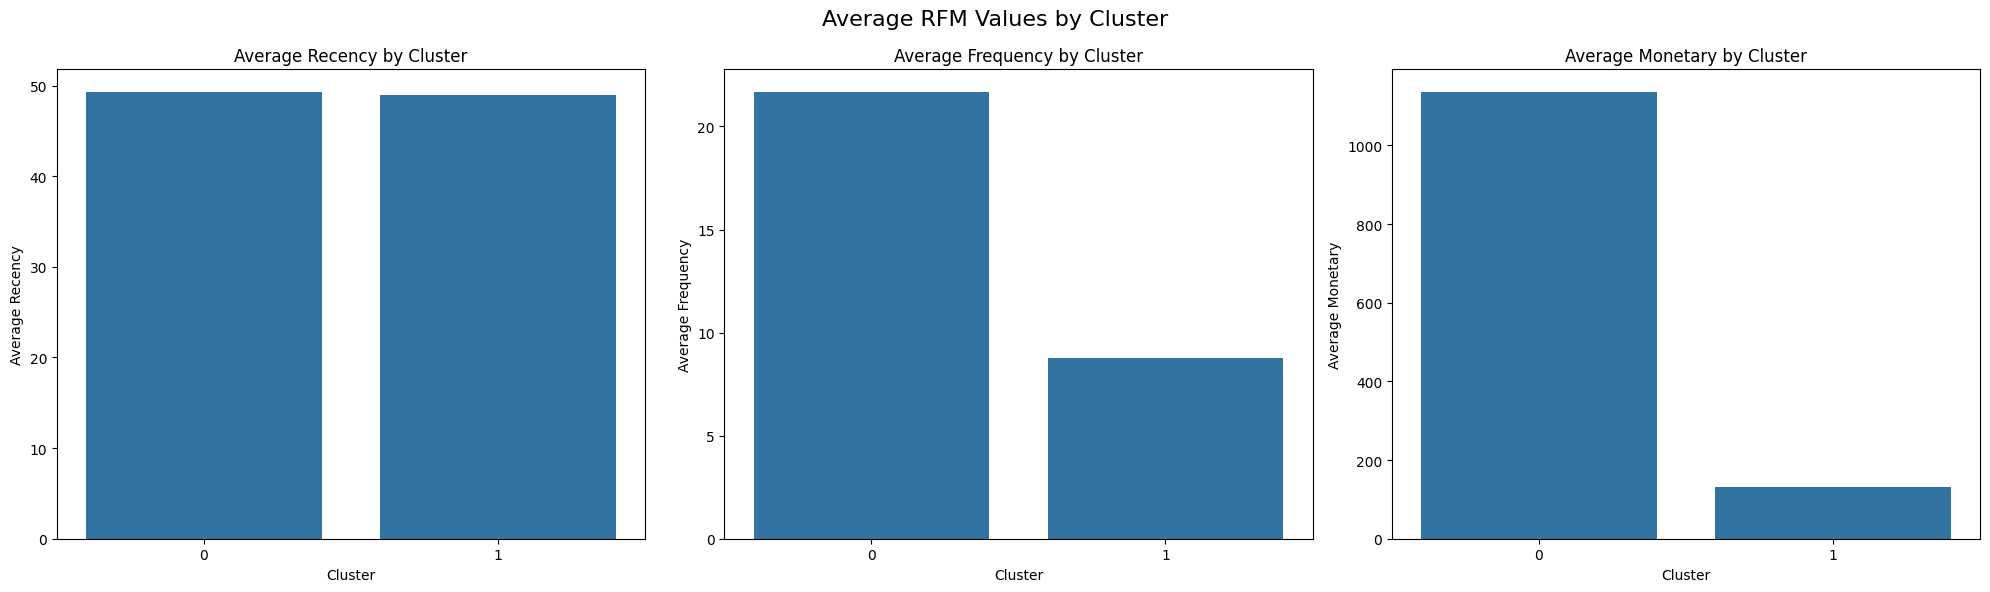

In [26]:
# average values for each cluster
avg_df = rfm_clustered.groupby(['Cluster'], as_index=False).mean()

# bar plots for each RFM metric
metrics = ['Recency', 'Frequency', 'Monetary']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Average RFM Values by Cluster', fontsize=16)

for i, metric in enumerate(metrics):
    sns.barplot(x='Cluster', y=metric, data=avg_df, ax=axes[i])
    axes[i].set_title(f'Average {metric} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(f'Average {metric}')

plt.tight_layout()
plt.show()